<a href="https://colab.research.google.com/github/juliosdutra/Controle_de_Processos_UFES/blob/main/Miscellaneous/ListaII_sistema_de_press%C3%A3o_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

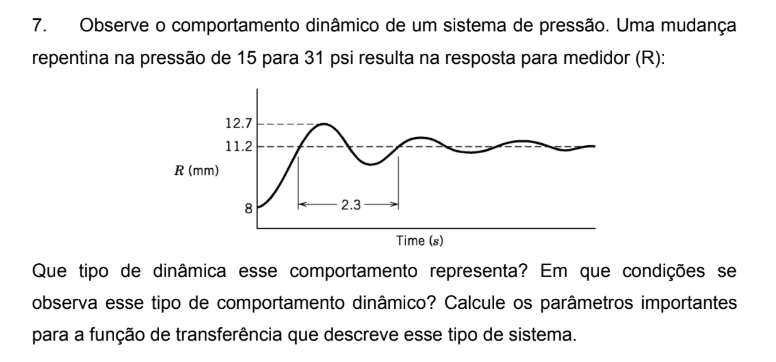


In [2]:
!pip install -qq control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 8.2 MB/s eta 0:00:00


In [3]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

Ganho estacionário, K = 0.2000
Período natural, tau = 0.3559
Fator de amortecimento, xi = 0.2345


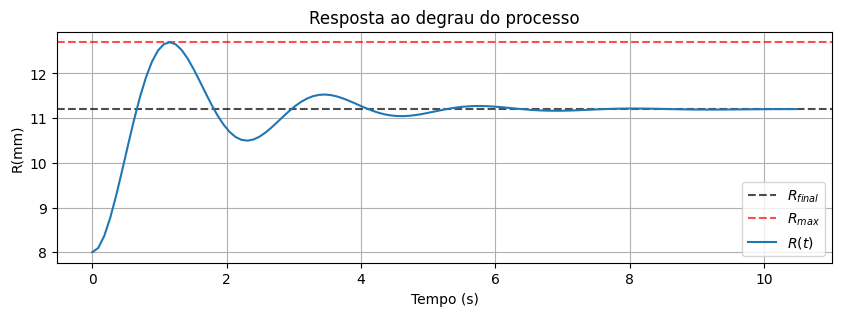

In [10]:
# Dados do processo
R0 = 8.0
Rfinal = 11.2
Rmax = 12.7

# Ganho estacionário
deltaP = 31-15
deltaR = Rfinal-R0
K = (deltaR)/(deltaP)

# Fator de amortecimento
OS = (Rmax-Rfinal)/(deltaR)
f = lambda xi: OS - np.exp(-np.pi*xi/np.sqrt(1-xi**2))
xi = fsolve(f, 0.5)[0]

# Período natural
P = 2.3
tau = P*np.sqrt(1-xi**2)/(2*np.pi)

# Resultados
print(f'Ganho estacionário, K = {K:1.4f}')
print(f'Período natural, tau = {tau:1.4f}')
print(f'Fator de amortecimento, xi = {xi:1.4f}')

# Simulação do teste
G = ct.tf(K, [tau**2, 2*xi*tau, 1])
t, y_desvio = ct.step_response(G)
y = deltaP*y_desvio + R0

fig, ax = plt.subplots(1,1, figsize=(10,3))
ax.axhline(Rfinal, linestyle='--', label = r'$R_{final}$', color='k', alpha=0.7)
ax.axhline(Rmax, linestyle='--', label = r'$R_{max}$', color='r', alpha=0.7)
ax.plot(t, y, label = r'$R(t)$',)
ax.set_title('Resposta ao degrau do processo')
ax.set_xlabel('Tempo (s)')
ax.set_ylabel('R(mm)')
ax.legend()
ax.grid()